In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

## This notebook is for exploratory of the asthma disease data

In [2]:
asthma_data = pd.read_csv('../data/asthma_disease_data.csv')

In [3]:
def convert_to_snake_case(df):
    """
    Converts all column names in a DataFrame to snake_case.
    
    Parameters:
    df: The DataFrame whose columns need to be renamed.
    
    Returns:
    pd.DataFrame: A DataFrame with column names in snake_case.
    """
    def snake_case(s):
        snake_case = s
        snake_case = re.sub(r' ', '_', snake_case)
        return snake_case.lower()
    
    # Apply snake_case to all column names
    return [snake_case(col) for col in df.columns]

In [4]:
asthma_data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [5]:
asthma_data_tidy = asthma_data
asthma_data_tidy.columns = convert_to_snake_case(asthma_data_tidy)


In [6]:
asthma_data_tidy.columns

Index(['patientid', 'age', 'gender', 'ethnicity', 'educationlevel', 'bmi',
       'smoking', 'physicalactivity', 'dietquality', 'sleepquality',
       'pollutionexposure', 'pollenexposure', 'dustexposure', 'petallergy',
       'familyhistoryasthma', 'historyofallergies', 'eczema', 'hayfever',
       'gastroesophagealreflux', 'lungfunctionfev1', 'lungfunctionfvc',
       'wheezing', 'shortnessofbreath', 'chesttightness', 'coughing',
       'nighttimesymptoms', 'exerciseinduced', 'diagnosis', 'doctorincharge'],
      dtype='object')

In [7]:
len(asthma_data_tidy)

2392

In [8]:
asthma_data_tidy.gender.value_counts()

gender
0    1212
1    1180
Name: count, dtype: int64

In [9]:
asthma_data_tidy[asthma_data_tidy.diagnosis==1].smoking.value_counts()

smoking
0    110
1     14
Name: count, dtype: int64

In [19]:
asthma_data_tidy[asthma_data_tidy.diagnosis == 1]

,age,gender,ethnicity,education_level,bmi,smoking,physical_activity,diet_quality,sleep_quality,pollution_exposure,...,gastro_esophageal_reflux,lung_function_fev_1,lung_function_fv_c,wheezing,shortness_of_breath,chest_tightness,coughing,nighttime_symptoms,exercise_induced,diagnosis
2152,31,1,0,0,15.962873,0,8.164127,0.032833,5.065319,2.095087,...,0,1.289722,1.856247,0,0,1,0,1,1,1
2153,45,1,0,0,18.836049,0,4.429940,0.438220,4.431921,8.840350,...,0,1.439283,3.185382,1,1,1,0,1,1,1
2154,69,1,0,2,18.094707,0,5.648944,4.736220,8.946940,3.825080,...,1,2.076774,1.993044,0,1,1,0,1,0,1
2160,49,1,1,0,17.310073,0,6.746501,8.885441,6.077918,9.210345,...,0,2.328614,5.757570,1,1,0,0,0,1,1
2161,60,1,0,2,32.713025,0,0.416681,9.026695,4.751102,3.140352,...,1,3.419582,2.621883,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,65,1,0,2,21.132937,0,7.024412,2.935468,6.105681,9.395218,...,0,2.794848,5.309860,0,0,0,1,1,1,1
2384,31,0,0,2,31.821008,1,8.516835,3.532328,9.442670,9.240483,...,1,1.883568,2.592148,0,0,0,0,1,1,1
2387,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,...,0,3.125249,5.166032,0,1,0,0,0,1,1
2388,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,7.733983,...,0,1.132977,5.509502,0,0,0,1,1,0,1


In [10]:
asthma_data_tidy

,patientid,age,gender,ethnicity,educationlevel,bmi,smoking,physicalactivity,dietquality,sleepquality,...,lungfunctionfev1,lungfunctionfvc,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,diagnosis,doctorincharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [11]:
asthma_by_age = asthma_data_tidy[asthma_data_tidy.diagnosis == 1].age.value_counts().reset_index()

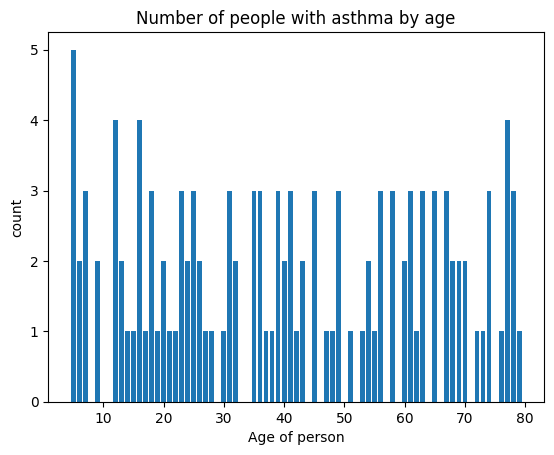

In [12]:
plt.bar(asthma_by_age.age, asthma_by_age['count'])

plt.xlabel('Age of person')
plt.ylabel('count')

plt.title('Number of people with asthma by age')

plt.show()

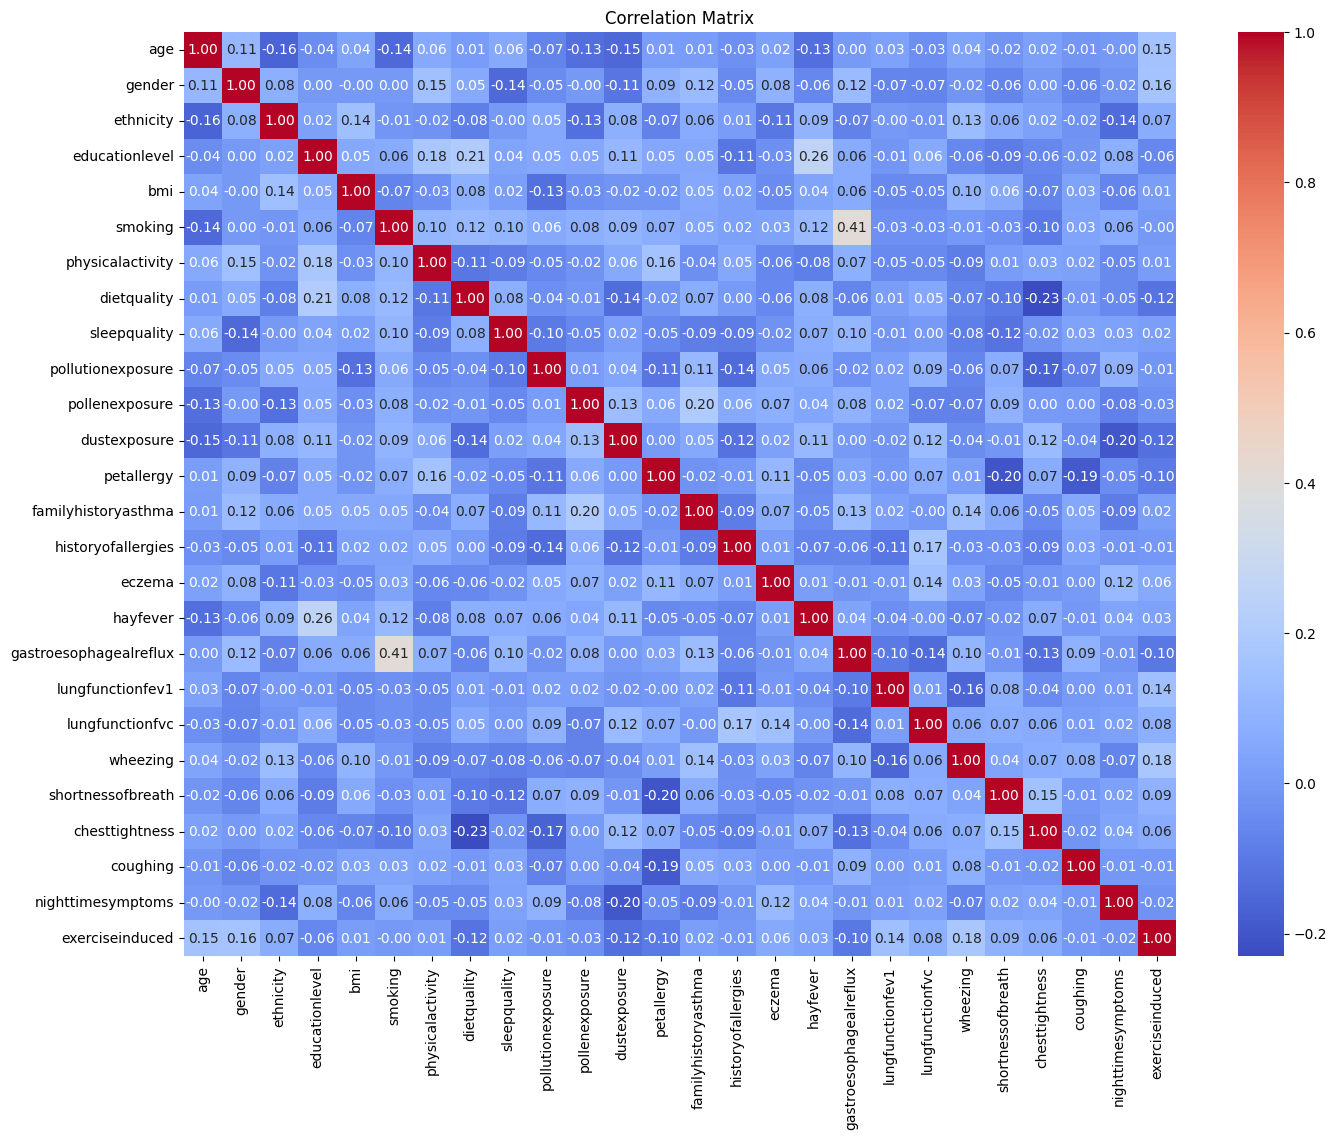

In [13]:
df = pd.DataFrame(asthma_data_tidy[asthma_data_tidy.diagnosis==1])

df_numeric = df.drop(columns=["patientid", "doctorincharge", "diagnosis"])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

There are some obivous correlations, like smoking and gastro esophageal reflux. And also many small negative trends.

In [14]:
asthma_data_tidy = asthma_data_tidy.rename(columns={'patientid': 'patient_id', 'educationlevel': 'education_level', 'physicalactivity': 'physical_activity', 
'dietquality': 'diet_quality', 'sleepquality': 'sleep_quality', 'pollutionexposure': 'pollution_exposure', 
'pollenexposure': 'pollen_exposure', 'dustexposure': 'dust_exposure', 'petallergy': 'pet_allergy',
'familyhistoryasthma': 'family_history_asthma', 'historyofallergies': 'history_of_allergies',
'hayfever': 'hay_fever', 'gastroesophagealreflux': 'gastro_esophageal_reflux',
'lungfunctionfev1':'lung_function_fev_1', 'lungfunctionfvc':'lung_function_fv_c',
'shortnessofbreath': 'shortness_of_breath', 'chesttightness': 'chest_tightness',
'nighttimesymptoms': 'nighttime_symptoms', 'exerciseinduced': 'exercise_induced', 'doctorincharge': 'doctor_incharge'})

In [15]:
asthma_data_tidy.columns

Index(['patient_id', 'age', 'gender', 'ethnicity', 'education_level', 'bmi',
       'smoking', 'physical_activity', 'diet_quality', 'sleep_quality',
       'pollution_exposure', 'pollen_exposure', 'dust_exposure', 'pet_allergy',
       'family_history_asthma', 'history_of_allergies', 'eczema', 'hay_fever',
       'gastro_esophageal_reflux', 'lung_function_fev_1', 'lung_function_fv_c',
       'wheezing', 'shortness_of_breath', 'chest_tightness', 'coughing',
       'nighttime_symptoms', 'exercise_induced', 'diagnosis',
       'doctor_incharge'],
      dtype='object')

In [16]:
asthma_data_tidy = asthma_data_tidy.drop(columns=['doctor_incharge', 'patient_id'])

In [17]:
asthma_data_tidy.dtypes

age                           int64
gender                        int64
ethnicity                     int64
education_level               int64
bmi                         float64
smoking                       int64
physical_activity           float64
diet_quality                float64
sleep_quality               float64
pollution_exposure          float64
pollen_exposure             float64
dust_exposure               float64
pet_allergy                   int64
family_history_asthma         int64
history_of_allergies          int64
eczema                        int64
hay_fever                     int64
gastro_esophageal_reflux      int64
lung_function_fev_1         float64
lung_function_fv_c          float64
wheezing                      int64
shortness_of_breath           int64
chest_tightness               int64
coughing                      int64
nighttime_symptoms            int64
exercise_induced              int64
diagnosis                     int64
dtype: object

In [18]:
asthma_data_tidy.to_pickle('asthma_data_tidy.pkl')